# Image features exercise
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. For more details see the [assignments page](http://vision.stanford.edu/teaching/cs231n/assignments.html) on the course website.*

We have seen that we can achieve reasonable performance on an image classification task by training a linear classifier on the pixels of the input image. In this exercise we will show that we can improve our classification performance by training linear classifiers not on raw pixels but on features that are computed from the raw pixels.

All of your work for this exercise will be done in this notebook.

In [1]:
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## Load data
Similar to previous exercises, we will load CIFAR-10 data from disk.

In [2]:
from cs231n.features import color_histogram_hsv, hog_feature

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
  # Load the raw CIFAR-10 data
  cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
  X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
  
  # Subsample the data
  mask = range(num_training, num_training + num_validation)
  X_val = X_train[mask]
  y_val = y_train[mask]
  mask = range(num_training)
  X_train = X_train[mask]
  y_train = y_train[mask]
  mask = range(num_test)
  X_test = X_test[mask]
  y_test = y_test[mask]

  return X_train, y_train, X_val, y_val, X_test, y_test

X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()

## Extract Features
For each image we will compute a Histogram of Oriented
Gradients (HOG) as well as a color histogram using the hue channel in HSV
color space. We form our final feature vector for each image by concatenating
the HOG and color histogram feature vectors.

Roughly speaking, HOG should capture the texture of the image while ignoring
color information, and the color histogram represents the color of the input
image while ignoring texture. As a result, we expect that using both together
ought to work better than using either alone. Verifying this assumption would
be a good thing to try for the bonus section.

The `hog_feature` and `color_histogram_hsv` functions both operate on a single
image and return a feature vector for that image. The extract_features
function takes a set of images and a list of feature functions and evaluates
each feature function on each image, storing the results in a matrix where
each column is the concatenation of all feature vectors for a single image.

In [3]:
from cs231n.features import *

num_color_bins = 10 # Number of bins in the color histogram
feature_fns = [hog_feature, lambda img: color_histogram_hsv(img, nbin=num_color_bins)]
X_train_feats = extract_features(X_train, feature_fns, verbose=True)
X_val_feats = extract_features(X_val, feature_fns)
X_test_feats = extract_features(X_test, feature_fns)

# Preprocessing: Subtract the mean feature
mean_feat = np.mean(X_train_feats, axis=0, keepdims=True)
X_train_feats -= mean_feat
X_val_feats -= mean_feat
X_test_feats -= mean_feat

# Preprocessing: Divide by standard deviation. This ensures that each feature
# has roughly the same scale.
std_feat = np.std(X_train_feats, axis=0, keepdims=True)
X_train_feats /= std_feat
X_val_feats /= std_feat
X_test_feats /= std_feat

# Preprocessing: Add a bias dimension
X_train_feats = np.hstack([X_train_feats, np.ones((X_train_feats.shape[0], 1))])
X_val_feats = np.hstack([X_val_feats, np.ones((X_val_feats.shape[0], 1))])
X_test_feats = np.hstack([X_test_feats, np.ones((X_test_feats.shape[0], 1))])

Done extracting features for 1000 / 49000 images
Done extracting features for 2000 / 49000 images
Done extracting features for 3000 / 49000 images
Done extracting features for 4000 / 49000 images
Done extracting features for 5000 / 49000 images
Done extracting features for 6000 / 49000 images
Done extracting features for 7000 / 49000 images
Done extracting features for 8000 / 49000 images
Done extracting features for 9000 / 49000 images
Done extracting features for 10000 / 49000 images
Done extracting features for 11000 / 49000 images
Done extracting features for 12000 / 49000 images
Done extracting features for 13000 / 49000 images
Done extracting features for 14000 / 49000 images
Done extracting features for 15000 / 49000 images
Done extracting features for 16000 / 49000 images
Done extracting features for 17000 / 49000 images
Done extracting features for 18000 / 49000 images
Done extracting features for 19000 / 49000 images
Done extracting features for 20000 / 49000 images
Done extr

## Train SVM on features
Using the multiclass SVM code developed earlier in the assignment, train SVMs on top of the features extracted above; this should achieve better results than training SVMs directly on top of raw pixels.

In [ ]:
# Use the validation set to tune the learning rate and regularization strength

from cs231n.classifiers.linear_classifier import LinearSVM

learning_rates = [1e-9, 1e-8, 1e-7]
regularization_strengths = [1e5, 1e6, 1e7]

results = {}
best_val = -1
best_svm = None

pass
################################################################################
# TODO:                                                                        #
# Use the validation set to set the learning rate and regularization strength. #
# This should be identical to the validation that you did for the SVM; save    #
# the best trained classifer in best_svm. You might also want to play          #
# with different numbers of bins in the color histogram. If you are careful    #
# you should be able to get accuracy of near 0.44 on the validation set.       #
################################################################################
pass
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print 'lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy)
    
print 'best validation accuracy achieved during cross-validation: %f' % best_val

In [17]:
X_train_feats.shape
#X_train=X_train.reshape(X_train.shape[0],-1)

(49000, 155)

/home/syd_jashim2/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:19: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.


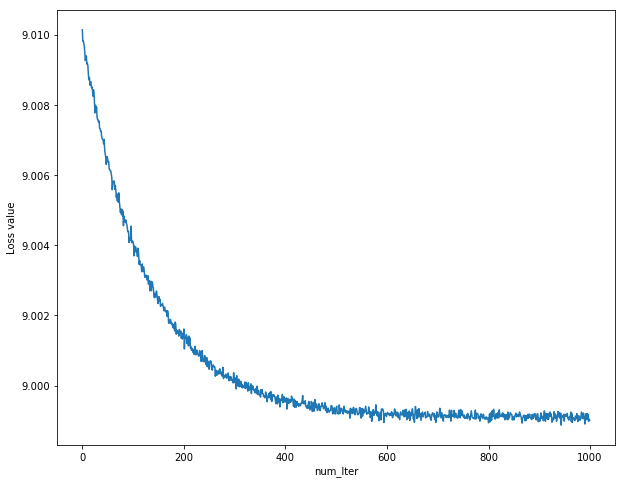

lr 1.000000e-09 reg 3.900000e+04 train accuracy: 0.000000 val accuracy: 0.417000
lr 1.000000e-09 reg 3.910000e+04 train accuracy: 0.000000 val accuracy: 0.417000
lr 1.000000e-09 reg 3.930000e+04 train accuracy: 0.000000 val accuracy: 0.417000
lr 1.000000e-09 reg 3.940000e+04 train accuracy: 0.000000 val accuracy: 0.417000
lr 1.000000e-08 reg 3.900000e+04 train accuracy: 0.000000 val accuracy: 0.420000
lr 1.000000e-08 reg 3.910000e+04 train accuracy: 0.000000 val accuracy: 0.418000
lr 1.000000e-08 reg 3.930000e+04 train accuracy: 0.000000 val accuracy: 0.417000
lr 1.000000e-08 reg 3.940000e+04 train accuracy: 0.000000 val accuracy: 0.418000
lr 1.000000e-07 reg 3.900000e+04 train accuracy: 0.000000 val accuracy: 0.418000
lr 1.000000e-07 reg 3.910000e+04 train accuracy: 0.000000 val accuracy: 0.423000
lr 1.000000e-07 reg 3.930000e+04 train accuracy: 0.000000 val accuracy: 0.413000
lr 1.000000e-07 reg 3.940000e+04 train accuracy: 0.000000 val accuracy: 0.245000
best validation accuracy ach

In [10]:
# Use the validation set to tune hyperparameters (regularization strength and
# learning rate). You should experiment with different ranges for the learning
# rates and regularization strengths; if you are careful you should be able to
# get a classification accuracy of about 0.4 on the validation set.
from cs231n.classifiers import LinearSVM
import numpy as np
np.random.seed(0)
results = {}
best_val = -1   # The highest validation accuracy that we have seen so far.
best_svm = None # The LinearSVM object that achieved the highest validation rate.
svm = LinearSVM()
learning_rates = [1e-7, 1e-8, 1e-9]
regularization_strengths = [3.94e4, 3.91e4, 3.9e4, 3.93e4]

for lrn_rate in learning_rates:
    for reg in regularization_strengths:
        tr_loss = svm.train(X_train_feats,y_train,lrn_rate,reg,num_iters=1000,batch_size=400)
        y_train_pred = svm.predict(X_train_feats)
        train_accuracy = np.mean(y_test==y_train_pred)
        y_val_predict = svm.predict(X_val_feats) 
        val_accuracy = np.mean(y_val == y_val_predict)
        results.setdefault((lrn_rate,reg),[])
        results[(lrn_rate,reg)].append(train_accuracy)
        results[(lrn_rate,reg)].append(val_accuracy)
        if val_accuracy > best_val:
            best_val = val_accuracy
            best_svm = svm
            best_loss = tr_loss
# results is dictionary mapping tuples of the form
# (learning_rate, regularization_strength) to tuples of the form
# (training_accuracy, validation_accuracy). The accuracy is simply the fraction
# of data points that are correctly classified.

################################################################################
# TODO:                                                                        #
# Write code that chooses the best hyperparameters by tuning on the validation #
# set. For each combination of hyperparameters, train a linear SVM on the      #
# training set, compute its accuracy on the training and validation sets, and  #
# store these numbers in the results dictionary. In addition, store the best   #
# validation accuracy in best_val and the LinearSVM object that achieves this  #
# accuracy in best_svm.                                                        #
#                                                                              #
# Hint: You should use a small value for num_iters as you develop your         #
# validation code so that the SVMs don't take much time to train; once you are #
# confident that your validation code works, you should rerun the validation   #
# code with a larger value for num_iters.                                      #
################################################################################
pass
################################################################################
#                              END OF YOUR CODE                                #
################################################################################
plt.plot(best_loss)
plt.xlabel('num_Iter')
plt.ylabel('Loss value')
plt.show()
# Print out results.

for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print 'lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy)
    
print 'best validation accuracy achieved during cross-validation: %f' % best_val

In [11]:
# Evaluate your trained SVM on the test set
y_test_pred = best_svm.predict(X_test_feats)
test_accuracy = np.mean(y_test == y_test_pred)
print test_accuracy

0.419


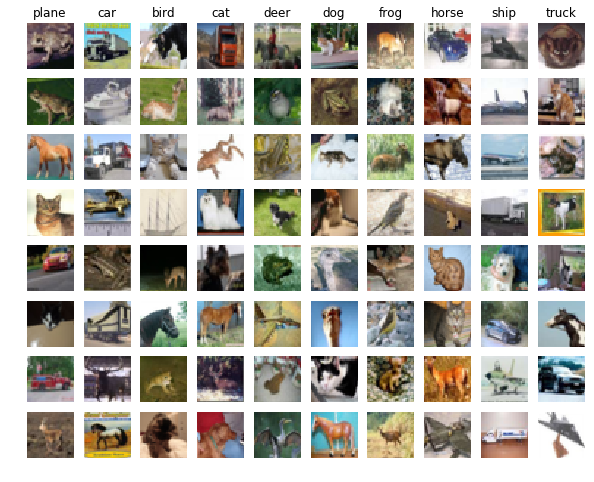

In [12]:
# An important way to gain intuition about how an algorithm works is to
# visualize the mistakes that it makes. In this visualization, we show examples
# of images that are misclassified by our current system. The first column
# shows images that our system labeled as "plane" but whose true label is
# something other than "plane".

examples_per_class = 8
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for cls, cls_name in enumerate(classes):
    idxs = np.where((y_test != cls) & (y_test_pred == cls))[0]
    idxs = np.random.choice(idxs, examples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt.subplot(examples_per_class, len(classes), i * len(classes) + cls + 1)
        plt.imshow(X_test[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls_name)
plt.show()

### Inline question 1:
Describe the misclassification results that you see. Do they make sense?

## Neural Network on image features
Earlier in this assigment we saw that training a two-layer neural network on raw pixels achieved better classification performance than linear classifiers on raw pixels. In this notebook we have seen that linear classifiers on image features outperform linear classifiers on raw pixels. 

For completeness, we should also try training a neural network on image features. This approach should outperform all previous approaches: you should easily be able to achieve over 55% classification accuracy on the test set; our best model achieves about 60% classification accuracy.

In [22]:
def decision_plots(stats):
    plt.subplot(2, 1, 1)
    plt.plot(stats['loss_history'])
    plt.title('Loss history')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')

    plt.subplot(2, 1, 2)
    plt.plot(stats['train_acc_history'], label='train',color='r')
    plt.plot(stats['val_acc_history'], label='val',color='b')
    plt.title('Classification accuracy history')
    plt.xlabel('Epoch')
    plt.ylabel('Clasification accuracy')
    plt.show()

iteration 0 / 5000: loss 2.302587
iteration 100 / 5000: loss 2.302605
iteration 200 / 5000: loss 2.302636
iteration 300 / 5000: loss 2.302680
iteration 400 / 5000: loss 2.302616
iteration 500 / 5000: loss 2.302526
iteration 600 / 5000: loss 2.302660
iteration 700 / 5000: loss 2.302659
iteration 800 / 5000: loss 2.302551
iteration 900 / 5000: loss 2.302427
iteration 1000 / 5000: loss 2.302494
iteration 1100 / 5000: loss 2.302668
iteration 1200 / 5000: loss 2.302744
iteration 1300 / 5000: loss 2.302713
iteration 1400 / 5000: loss 2.302402
iteration 1500 / 5000: loss 2.302551
iteration 1600 / 5000: loss 2.302721
iteration 1700 / 5000: loss 2.302499
iteration 1800 / 5000: loss 2.302369
iteration 1900 / 5000: loss 2.302592
iteration 2000 / 5000: loss 2.302607
iteration 2100 / 5000: loss 2.302493
iteration 2200 / 5000: loss 2.302486
iteration 2300 / 5000: loss 2.302851
iteration 2400 / 5000: loss 2.302216
iteration 2500 / 5000: loss 2.302526
iteration 2600 / 5000: loss 2.302461
iteration 270

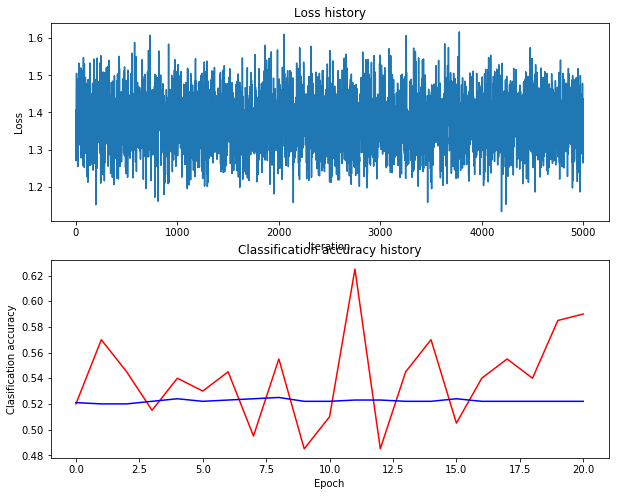

test_acc (with best_net): 0.527


In [34]:
from cs231n.classifiers.neural_net import TwoLayerNet

input_dim = X_train_feats.shape[1]
hidden_dim = 500
num_classes = 10
best_net = None # store the best model into this 
best_acc = None
num_iters=5000
l_reg =  0.01*np.random.uniform(0,0.5,size=4) 
learn_rate = 0.01*np.random.uniform(0.1,0.5,size=4) 
net = TwoLayerNet(input_dim, hidden_dim, num_classes)
for reg in l_reg:
    for lrn_rate in learn_rate:
        stats = net.train(X_train_feats, y_train, X_val_feats, y_val,
            num_iters=num_iters, batch_size=200,
            learning_rate=lrn_rate, learning_rate_decay=0.95,
            reg=reg, verbose=True)
        #for i in range (len(stats['loss_history'])):
            #if i%1000 == 0:
                #print stats['loss_history'][i]
        #val_acc = max(stats['val_acc_history'])
        val_acc = (net.predict(X_val_feats) == y_val).mean()
        if val_acc > best_acc:
            best_acc = val_acc
            best_net = net
            best_stats = stats
            best_reg = reg
            best_lrn_rate = lrn_rate
            best_tr_acc = max(stats['train_acc_history'])
            print "best_val_acc",best_acc,"best_tr_acc:",best_tr_acc,"reg:",reg,"lrn_rate:",lrn_rate   
decision_plots(best_stats)            
test_acc = (best_net.predict(X_test_feats)==y_test).mean()
print "test_acc (with best_net):",test_acc
#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.                                                            #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  #
# write code to sweep through possible combinations of hyperparameters          #
# automatically like we did on the previous exercises.                          #
#################################################################################
pass
#################################################################################
#                               END OF YOUR CODE                                #
#################################################################################

In [35]:
# Run your neural net classifier on the test set. You should be able to
# get more than 55% accuracy.

test_acc = (net.predict(X_test_feats) == y_test).mean()
print test_acc

0.527
